In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import matplotlib.pyplot as plt

%matplotlib inline

# Read in data
df = pd.read_csv('csgo_players.csv')

# Assuming 'player_id' is the unique identifier
df = df.drop(['nickname', 'real_name', 'country', 'current_team', 'teams'], axis=1)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.drop_duplicates()
df = df.dropna(axis=1, how='all')
df = df.dropna()

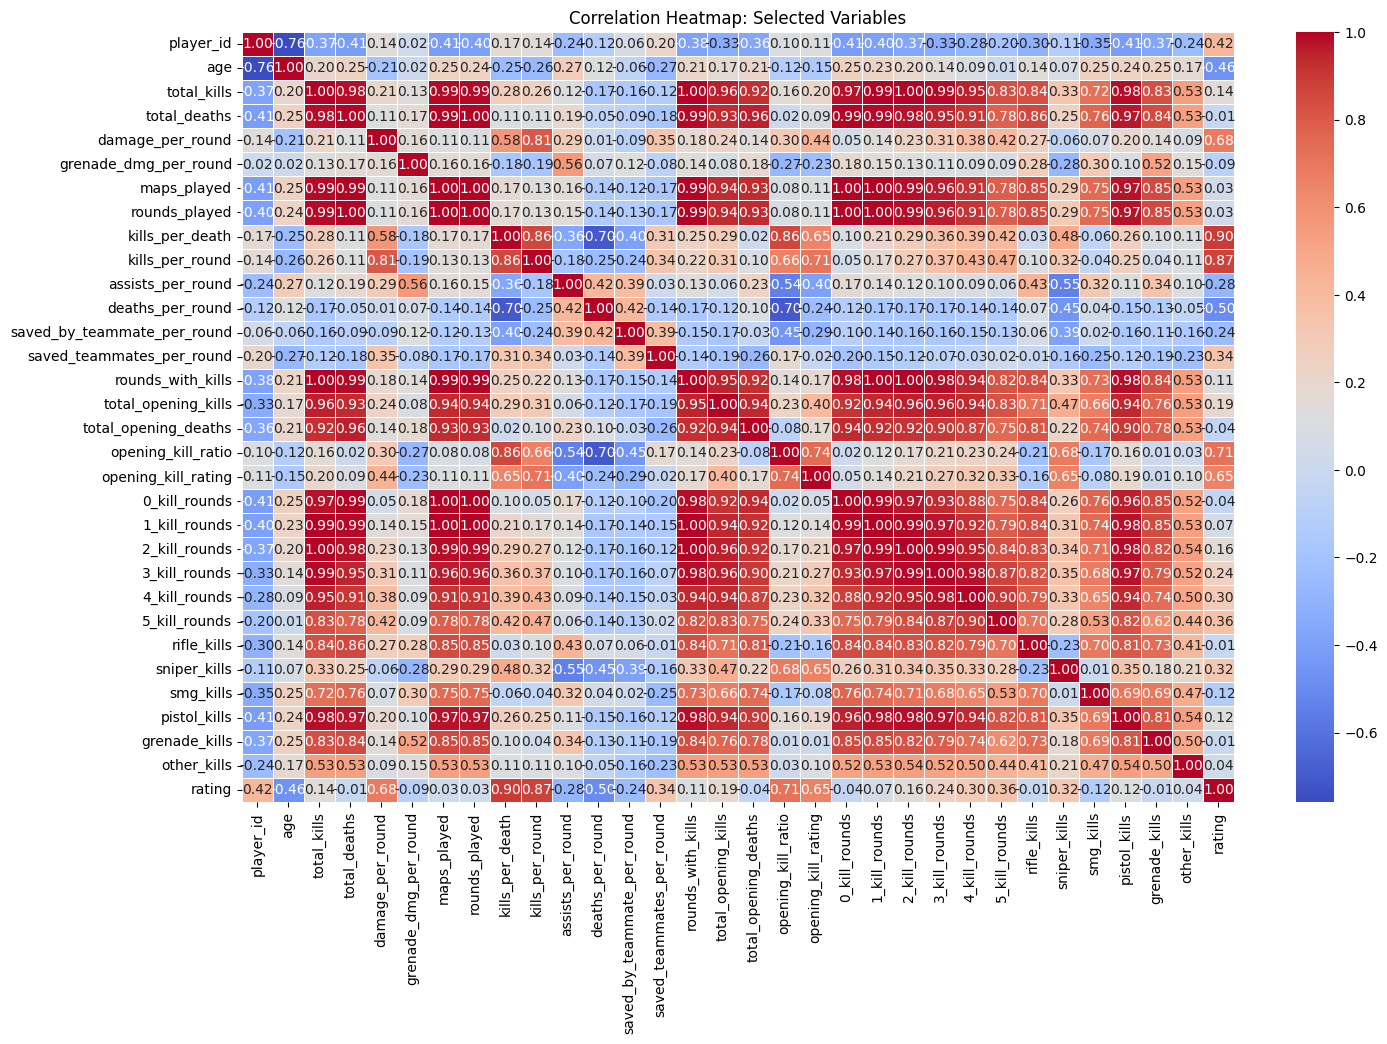

In [51]:
# Check for multicollinearity
correlation_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Selected Variables')
plt.show()

In [52]:
# Extract dependent and independent variables
y = df['rating']
X = df.drop(['rating'], axis=1)
X = sm.add_constant(X)

# Fit ordinary least squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Display model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     378.4
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:58:59   Log-Likelihood:                 2076.1
No. Observations:                 811   AIC:                            -4092.
Df Residuals:                     781   BIC:                            -3951.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [53]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns

# Add a small constant to avoid division by zero
vif_data["VIF"] = [variance_inflation_factor(X.values, i) + 1e-10 if X.iloc[:, i].var() != 0 else float('inf') for i in range(X.shape[1])]

# Display VIF results
print("\nVIF Results:")
print(vif_data)


VIF Results:
                       Variable           VIF
0                         const           inf
1                     player_id  3.085491e+00
2                           age  3.108800e+00
3                   total_kills  8.536019e+05
4                  total_deaths  1.733710e+03
5              damage_per_round  1.197608e+01
6         grenade_dmg_per_round  3.786920e+00
7                   maps_played  1.880414e+03
8                 rounds_played           inf
9               kills_per_death  1.596726e+02
10              kills_per_round  8.192818e+01
11            assists_per_round  5.881575e+00
12             deaths_per_round  3.287090e+01
13  saved_by_teammate_per_round  2.906447e+00
14    saved_teammates_per_round  2.779988e+00
15            rounds_with_kills           inf
16          total_opening_kills  3.074601e+02
17         total_opening_deaths  2.356167e+02
18           opening_kill_ratio  2.775622e+01
19          opening_kill_rating  1.784148e+01
20                0_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


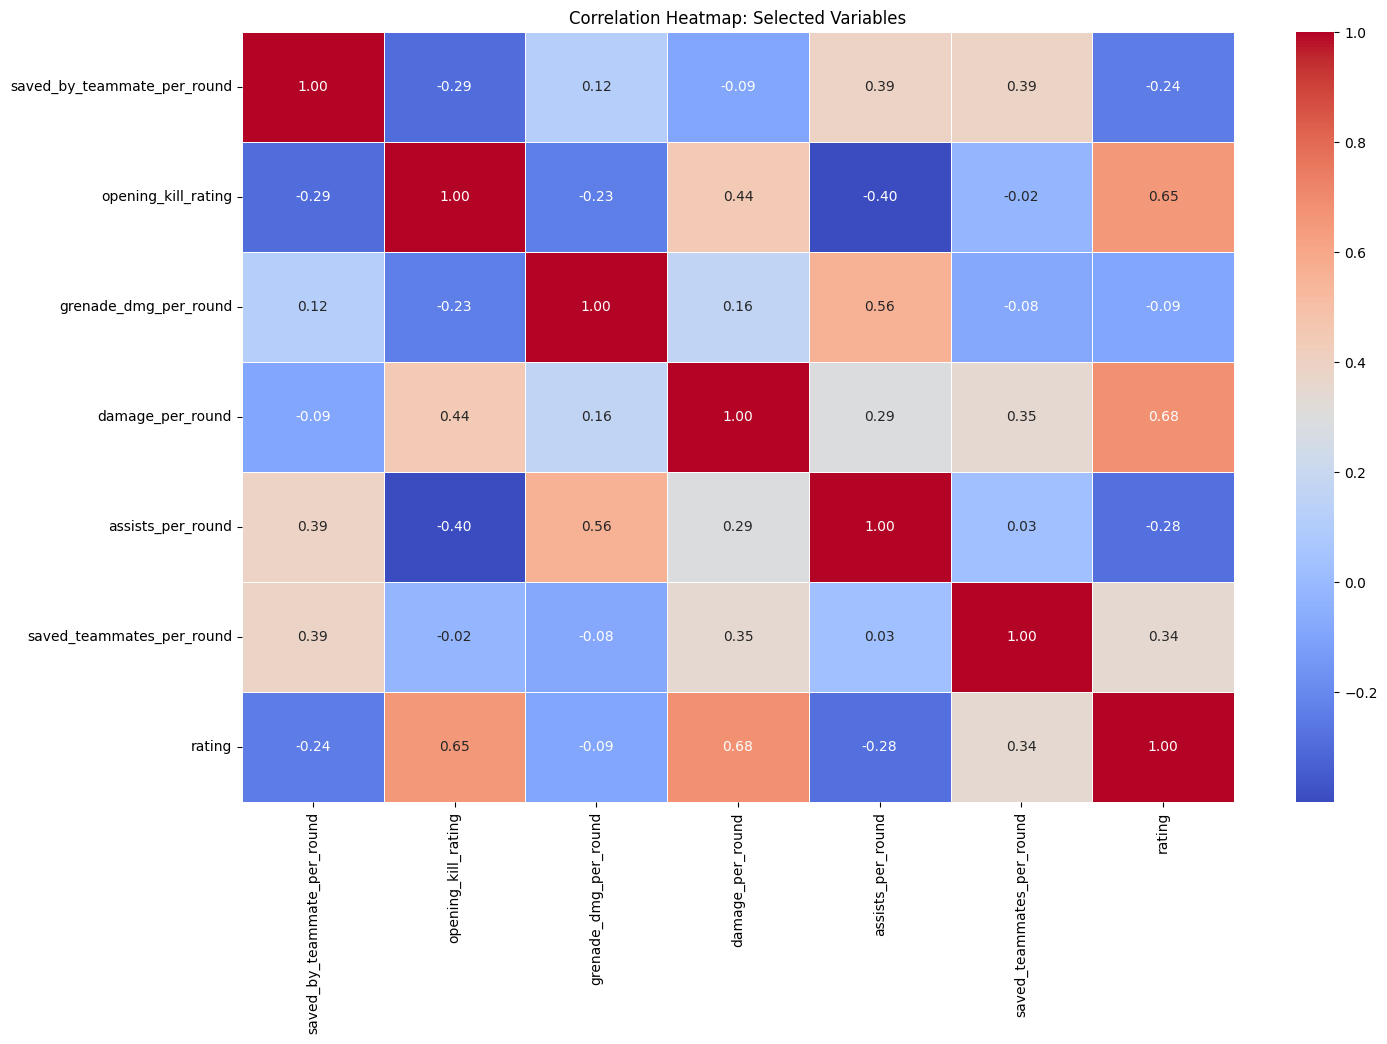

In [54]:
# Select variables for analysis
selected_vars = ['saved_by_teammate_per_round', 'opening_kill_rating', 
                 'grenade_dmg_per_round', 'damage_per_round', 
                 'assists_per_round', 'saved_teammates_per_round', 'rating']

# Filter the dataset for selected variables
df_selected = df[selected_vars]
# Check for multicollinearity
correlation_matrix = df_selected.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Selected Variables')
plt.show()

In [55]:
# Perform the multiple linear regression on the selected variables
y_selected = df_selected['rating']
X_selected = sm.add_constant(df_selected.drop(['rating'], axis=1))

model_selected = sm.OLS(y_selected, X_selected).fit()

# Print the regression results for the selected model
print(model_selected.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     395.8
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          4.42e-236
Time:                        17:59:00   Log-Likelihood:                 1534.1
No. Observations:                 811   AIC:                            -3054.
Df Residuals:                     804   BIC:                            -3021.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [56]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

# Display VIF results
print("\nVIF Results:")
print(vif_data)


VIF Results:
                      Variable         VIF
0                        const  521.560679
1  saved_by_teammate_per_round    1.848526
2          opening_kill_rating    2.365610
3        grenade_dmg_per_round    1.489885
4             damage_per_round    3.003122
5            assists_per_round    3.128312
6    saved_teammates_per_round    1.900605


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


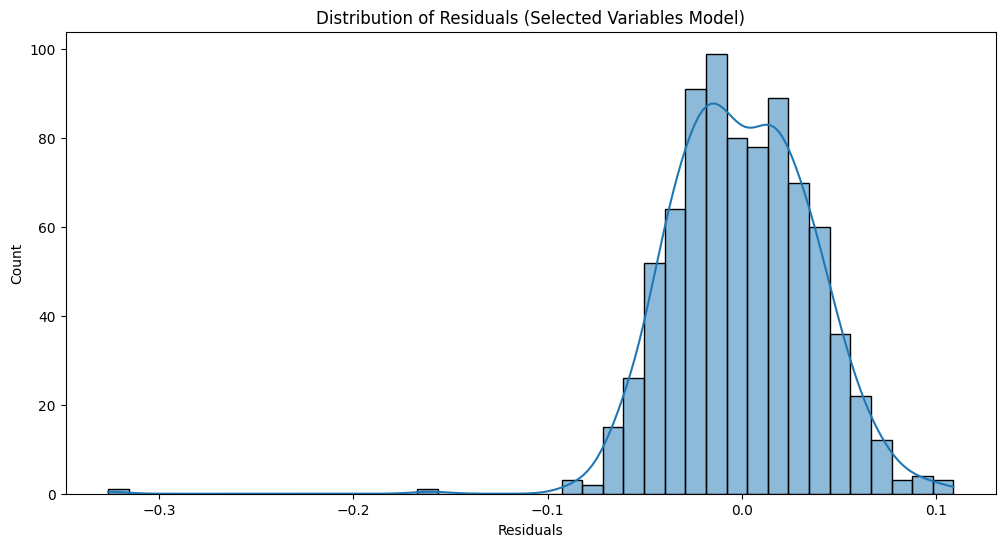

In [57]:
# Get residuals from the selected model
residuals_selected = model_selected.resid

# Plot histogram for residuals from the selected model
plt.figure(figsize=(12, 6))
sns.histplot(residuals_selected, kde=True)
plt.title('Distribution of Residuals (Selected Variables Model)')
plt.xlabel('Residuals')
plt.show()

<Figure size 800x800 with 0 Axes>

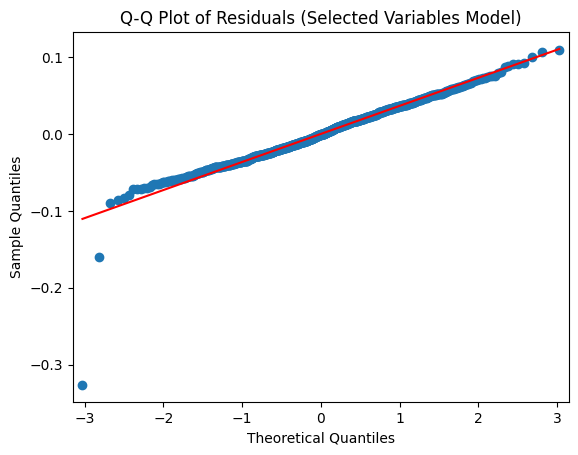

In [58]:
# Q-Q Plot for residuals from the selected model
plt.figure(figsize=(8, 8))
sm.qqplot(residuals_selected, line='s')
plt.title('Q-Q Plot of Residuals (Selected Variables Model)')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


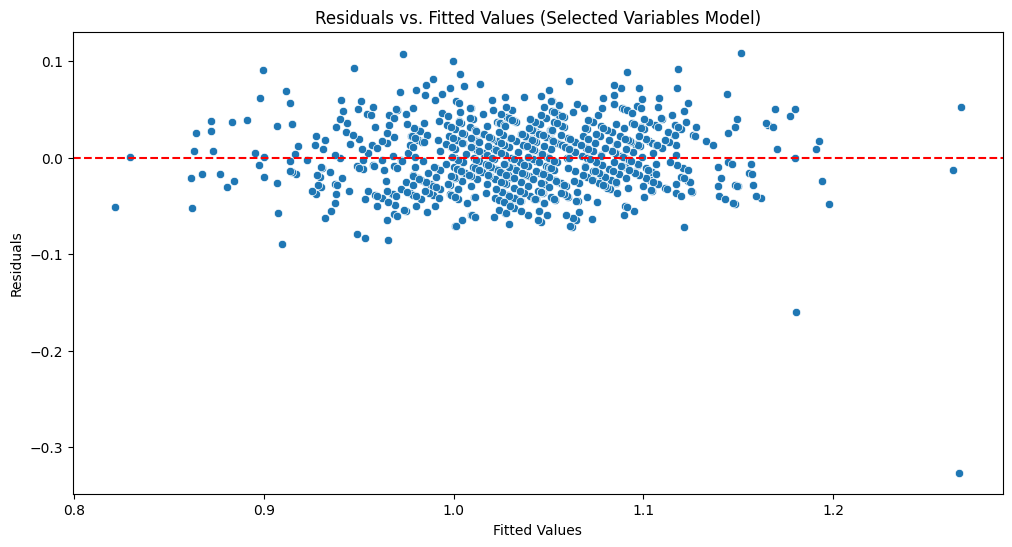

In [59]:
# Plot residuals vs. fitted values for the selected model
plt.figure(figsize=(12, 6))
sns.scatterplot(x=model_selected.fittedvalues, y=residuals_selected)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values (Selected Variables Model)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()